<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozoAula6Pr%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

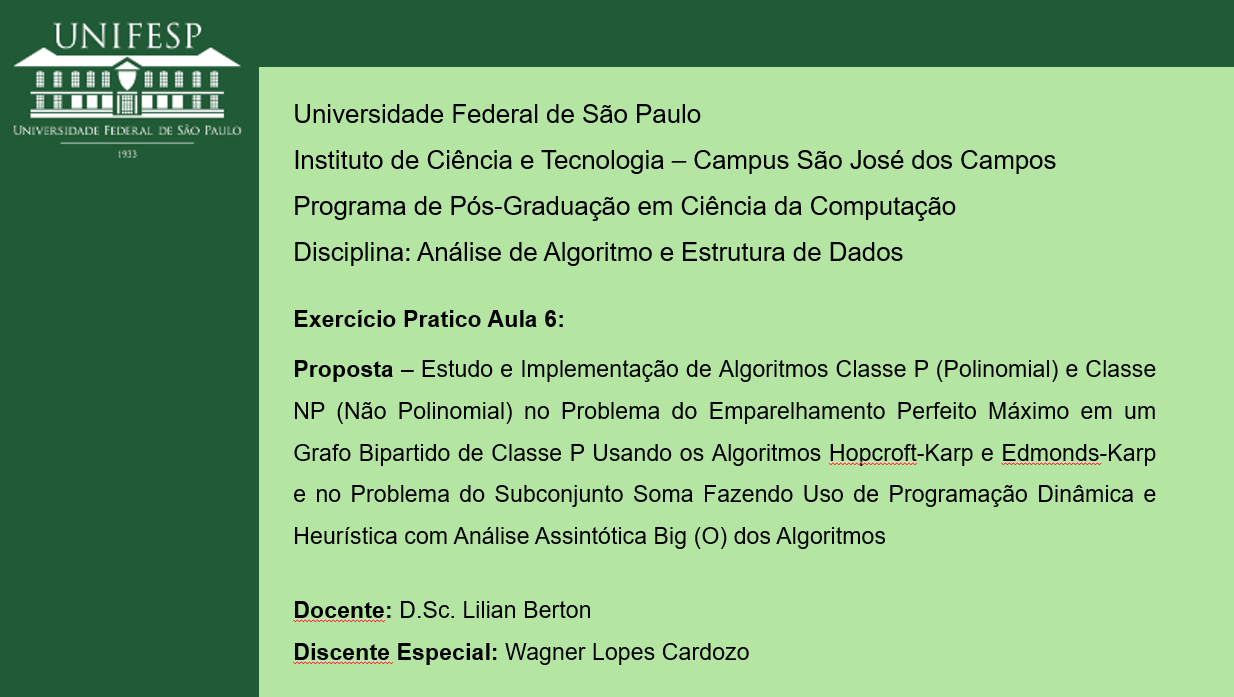

#<font color=lightgreen>Classe P

#<font color=lightgreen>Algoritmo Hopcroft-Karp

##<font color=lightgreen>**Para o Problema:** Emparelhamento Perfeito Máximo em Grafo Bipartido

##Descrição do problema:

Dado um grafo bipartido, onde o conjunto de vértices V pode ser dividido em dois subconjuntos disjuntos U e W, e todas as arestas conectam apenas vértices de U a W, o objetivo é encontrar um emparelhamento máximo — ou seja, o maior conjunto de arestas tal que nenhum vértice em U ou W seja conectado por mais de uma aresta. Quando o emparelhamento envolve todos os vértices de U ou W, ele é chamado de um emparelhamento perfeito.

Este problema tem aplicações em diversas áreas, como em design de redes de telecomunicações, alocação de tarefas e otimização de recursos.

##Uma Explicação Geral:

O problema do emparelhamento perfeito máximo é um problema não clássico, mas pertence à classe P, pois pode ser resolvido em tempo polinomial com algoritmos como o Hopcroft-Karp ou o Edmonds-Karp. Esses algoritmos são amplamente utilizados para otimização de recursos em redes bipartidas, alocação de tarefas e situações em que há dois conjuntos disjuntos que precisam ser emparelhados de maneira eficiente.

#Explicação do código:

##Funções bfs() e dfs(): Essas funções implementam a busca em largura (BFS) e a busca em profundidade (DFS), que são partes cruciais do algoritmo Hopcroft-Karp. O algoritmo alterna entre BFS para encontrar caminhos aumentantes e DFS para aumentar o emparelhamento.

* Função hopcroft_karp(): Esta função implementa o algoritmo Hopcroft-Karp, que encontra o emparelhamento perfeito máximo em um grafo bipartido.

* Função create_bipartite_graph(): Esta função cria um pequeno grafo bipartido. Neste exemplo, o conjunto U contém os vértices ['A', 'B', 'C', 'D'] e o conjunto V contém os vértices ['1', '2', '3', '4']. As arestas conectam esses dois conjuntos para formar o grafo bipartido.

* Função measure_performance(): Esta função mede o tempo de execução e a memória usada durante a execução do algoritmo Hopcroft-Karp. Ela utiliza o módulo time para medir o tempo e o módulo tracemalloc para medir a memória.

In [ ]:
import time
import tracemalloc
from collections import deque, defaultdict

# Função auxiliar para realizar a busca em largura (BFS)
def bfs():
    queue = deque()
    for u in U:
        if pair_U[u] == None:
            dist[u] = 0
            queue.append(u)
        else:
            dist[u] = float('inf')
    dist[None] = float('inf')
    while queue:
        u = queue.popleft()
        if dist[u] < dist[None]:
            for v in adj[u]:
                if dist[pair_V[v]] == float('inf'):
                    dist[pair_V[v]] = dist[u] + 1
                    queue.append(pair_V[v])
    return dist[None] != float('inf')

# Função auxiliar para realizar a busca em profundidade (DFS)
def dfs(u):
    if u is not None:
        for v in adj[u]:
            if dist[pair_V[v]] == dist[u] + 1:
                if dfs(pair_V[v]):
                    pair_V[v] = u
                    pair_U[u] = v
                    return True
        dist[u] = float('inf')
        return False
    return True

# Função principal para encontrar o emparelhamento máximo
def hopcroft_karp():
    matching = 0
    global pair_U, pair_V, dist
    pair_U = {u: None for u in U}
    pair_V = {v: None for v in V}
    dist = {}
    while bfs():
        for u in U:
            if pair_U[u] is None:
                if dfs(u):
                    matching += 1
    return matching

# Função para criar um pequeno grafo bipartido
def create_bipartite_graph():
    global U, V, adj
    # Definindo os conjuntos bipartidos U e V
    U = ['A', 'B', 'C', 'D']
    V = ['1', '2', '3', '4']

    # Definindo as arestas entre os conjuntos U e V (grafo bipartido)
    adj = defaultdict(list)
    adj['A'].extend(['1', '3'])
    adj['B'].extend(['1', '2'])
    adj['C'].extend(['2', '4'])
    adj['D'].extend(['3'])

    return U, V, adj

# Função para medir o tempo de execução e a memória usada
def measure_performance():
    # Iniciando a medição de memória e tempo
    tracemalloc.start()
    start_time = time.time()

    # Executando o algoritmo Hopcroft-Karp
    matching = hopcroft_karp()

    # Calculando o tempo e memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibindo os resultados
    print(f"Emparelhamento máximo encontrado: {matching}")
    print("Emparelhamentos:")
    for u in U:
        if pair_U[u] is not None:
            print(f"{u} -- {pair_U[u]}")

    print(f"\nTempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Criando o grafo bipartido e executando o código
U, V, adj = create_bipartite_graph()
measure_performance()


Emparelhamento máximo encontrado: 4
Emparelhamentos:
A -- 1
B -- 2
C -- 4
D -- 3

Tempo de execução: 0.000086 segundos
Memória utilizada: 3224 bytes


##Este algoritmo é o mesmo do implementado acima, porém foi aumentado o número de vértices do conjunto U e do conjunto W para observar o tempo gasto de execução e a quantidade de memória usada. Este aumento tem que ser cauteloso devido o fato de ser um algoritmo gulosos Big O (V X E) sendo o V os vértice e o E as arestas.

In [ ]:
import time
import tracemalloc
from collections import deque, defaultdict

# Função auxiliar para realizar a busca em largura (BFS)
def bfs():
    queue = deque()
    for u in U:
        if pair_U[u] == None:
            dist[u] = 0
            queue.append(u)
        else:
            dist[u] = float('inf')
    dist[None] = float('inf')
    while queue:
        u = queue.popleft()
        if dist[u] < dist[None]:
            for v in adj[u]:
                if dist[pair_V[v]] == float('inf'):
                    dist[pair_V[v]] = dist[u] + 1
                    queue.append(pair_V[v])
    return dist[None] != float('inf')

# Função auxiliar para realizar a busca em profundidade (DFS)
def dfs(u):
    if u is not None:
        for v in adj[u]:
            if dist[pair_V[v]] == dist[u] + 1:
                if dfs(pair_V[v]):
                    pair_V[v] = u
                    pair_U[u] = v
                    return True
        dist[u] = float('inf')
        return False
    return True

# Função principal para encontrar o emparelhamento máximo
def hopcroft_karp():
    matching = 0
    global pair_U, pair_V, dist                                       # O (V X E) complexidade polinomial - são também relatados na literatura como sendo algoritmos gulosos.
    pair_U = {u: None for u in U}
    pair_V = {v: None for v in V}
    dist = {}
    while bfs():
        for u in U:
            if pair_U[u] is None:
                if dfs(u):
                    matching += 1
    return matching

# Função para criar um grafo bipartido com 12 emparelhamentos possíveis
def create_bipartite_graph():
    global U, V, adj
    # Definindo os conjuntos bipartidos U e V
    U = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
    V = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

    # Definindo as arestas entre os conjuntos U e V (grafo bipartido)
    adj = defaultdict(list)
    adj['A'].extend(['1', '2'])
    adj['B'].extend(['1', '3'])
    adj['C'].extend(['2', '4'])
    adj['D'].extend(['3', '5'])
    adj['E'].extend(['4', '6'])
    adj['F'].extend(['5', '7'])
    adj['G'].extend(['6', '8'])
    adj['H'].extend(['7', '9'])
    adj['I'].extend(['8', '10'])
    adj['J'].extend(['9', '11'])
    adj['K'].extend(['10', '12'])
    adj['L'].extend(['11', '12'])

    return U, V, adj

# Função para medir o tempo de execução e a memória usada
def measure_performance():
    # Iniciando a medição de memória e tempo
    tracemalloc.start()
    start_time = time.time()

    # Executando o algoritmo Hopcroft-Karp
    matching = hopcroft_karp()

    # Calculando o tempo e memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibindo os resultados
    print(f"Emparelhamento máximo encontrado: {matching}")
    print("Emparelhamentos:")
    for u in U:
        if pair_U[u] is not None:
            print(f"{u} -- {pair_U[u]}")

    print(f"\nTempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Criando o grafo bipartido e executando o código
U, V, adj = create_bipartite_graph()
measure_performance()


Emparelhamento máximo encontrado: 12
Emparelhamentos:
A -- 1
B -- 3
C -- 2
D -- 5
E -- 4
F -- 7
G -- 6
H -- 9
I -- 8
J -- 11
K -- 10
L -- 12

Tempo de execução: 0.000123 segundos
Memória utilizada: 4568 bytes


In [ ]:
!pip install networkx matplotlib

##Este algoritmo foi feito uma implementação da representação gráfica usando a biblioteca Python NetWorkX para uma observação do emparelhamento dos vértices entre os conjuntos do grafo bipartido

##**OBS: Pode ser uma representação gráfica melhorada em trabalhos futuros**

Emparelhamento máximo encontrado: 12
Emparelhamentos:
A -- 1
B -- 3
C -- 2
D -- 5
E -- 4
F -- 7
G -- 6
H -- 9
I -- 8
J -- 11
K -- 10
L -- 12

Tempo de execução: 0.000163 segundos
Memória utilizada: 3376 bytes


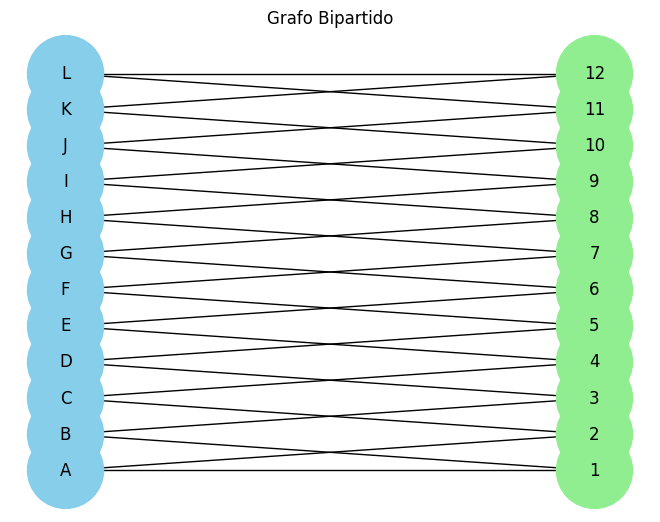

In [ ]:
import time
import tracemalloc
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Função auxiliar para realizar a busca em largura (BFS)
def bfs():
    queue = deque()
    for u in U:
        if pair_U[u] == None:
            dist[u] = 0
            queue.append(u)
        else:
            dist[u] = float('inf')
    dist[None] = float('inf')
    while queue:
        u = queue.popleft()
        if dist[u] < dist[None]:
            for v in adj[u]:
                if dist[pair_V[v]] == float('inf'):
                    dist[pair_V[v]] = dist[u] + 1
                    queue.append(pair_V[v])
    return dist[None] != float('inf')

# Função auxiliar para realizar a busca em profundidade (DFS)
def dfs(u):
    if u is not None:
        for v in adj[u]:
            if dist[pair_V[v]] == dist[u] + 1:
                if dfs(pair_V[v]):
                    pair_V[v] = u
                    pair_U[u] = v
                    return True
        dist[u] = float('inf')
        return False
    return True

# Função principal para encontrar o emparelhamento máximo
def hopcroft_karp():
    matching = 0
    global pair_U, pair_V, dist
    pair_U = {u: None for u in U}
    pair_V = {v: None for v in V}
    dist = {}
    while bfs():
        for u in U:
            if pair_U[u] is None:
                if dfs(u):
                    matching += 1
    return matching

# Função para criar um grafo bipartido com 12 emparelhamentos possíveis
def create_bipartite_graph():
    global U, V, adj
    # Definindo os conjuntos bipartidos U e V
    U = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
    V = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

    # Definindo as arestas entre os conjuntos U e V (grafo bipartido)
    adj = defaultdict(list)
    adj['A'].extend(['1', '2'])
    adj['B'].extend(['1', '3'])
    adj['C'].extend(['2', '4'])
    adj['D'].extend(['3', '5'])
    adj['E'].extend(['4', '6'])
    adj['F'].extend(['5', '7'])
    adj['G'].extend(['6', '8'])
    adj['H'].extend(['7', '9'])
    adj['I'].extend(['8', '10'])
    adj['J'].extend(['9', '11'])
    adj['K'].extend(['10', '12'])
    adj['L'].extend(['11', '12'])

    return U, V, adj

# Função para medir o tempo de execução e a memória usada
def measure_performance():
    # Iniciando a medição de memória e tempo
    tracemalloc.start()
    start_time = time.time()

    # Executando o algoritmo Hopcroft-Karp
    matching = hopcroft_karp()

    # Calculando o tempo e memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibindo os resultados
    print(f"Emparelhamento máximo encontrado: {matching}")
    print("Emparelhamentos:")
    for u in U:
        if pair_U[u] is not None:
            print(f"{u} -- {pair_U[u]}")

    print(f"\nTempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Função para exibir o grafo bipartido
def show_bipartite_graph(U, V, adj):
    # Criar o grafo bipartido usando NetworkX
    B = nx.Graph()

    # Adicionar nós de U e V
    B.add_nodes_from(U, bipartite=0)  # Conjunto U no lado esquerdo
    B.add_nodes_from(V, bipartite=1)  # Conjunto V no lado direito

    # Adicionar arestas entre U e V
    for u in U:
        for v in adj[u]:
            B.add_edge(u, v)

    # Definir a posição para exibir os nós do grafo em duas colunas (esquerda e direita)
    pos = {}
    pos.update((node, (0, index)) for index, node in enumerate(U))  # Coloca nós de U à esquerda
    pos.update((node, (1, index)) for index, node in enumerate(V))  # Coloca nós de V à direita

    # Desenhar o grafo
    nx.draw(B, pos, with_labels=True, node_color=["skyblue"] * len(U) + ["lightgreen"] * len(V), node_size=3000, font_size=12)

    # Exibir o gráfico
    plt.title("Grafo Bipartido")
    plt.show()

# Criando o grafo bipartido e executando o código
U, V, adj = create_bipartite_graph()
measure_performance()
show_bipartite_graph(U, V, adj)


#<font color=lightgreen>Algoritmo Edmonds-Karp

#Explicação do código:

##Função bfs(): Essa função encontra um caminho aumentante no grafo de fluxo residual, usando busca em largura (BFS).

* Função edmonds_karp(): Implementa o algoritmo de fluxo máximo de Edmonds-Karp, que itera enquanto encontra caminhos aumentantes e ajusta o fluxo ao longo desses caminhos.

* Função create_bipartite_flow_graph(): Cria um grafo bipartido representado como um grafo de fluxo, com um nó source (origem) conectado aos vértices de U e um nó sink (destino) conectado aos vértices de V. As arestas entre os nós de
U e V têm capacidade 1.

* Função measure_performance(): Mede o tempo de execução e a memória utilizada pelo algoritmo Edmonds-Karp.

* Função show_bipartite_graph(): Utiliza a biblioteca NetworkX para desenhar uma visualização gráfica do grafo bipartido.



Fluxo máximo (emparelhamento perfeito máximo): 12
Emparelhamentos:
A -- 1
B -- 3
C -- 2
D -- 5
E -- 4
F -- 7
G -- 6
H -- 9
I -- 8
J -- 11
K -- 10
L -- 12

Tempo de execução: 0.000678 segundos
Memória utilizada: 7080 bytes


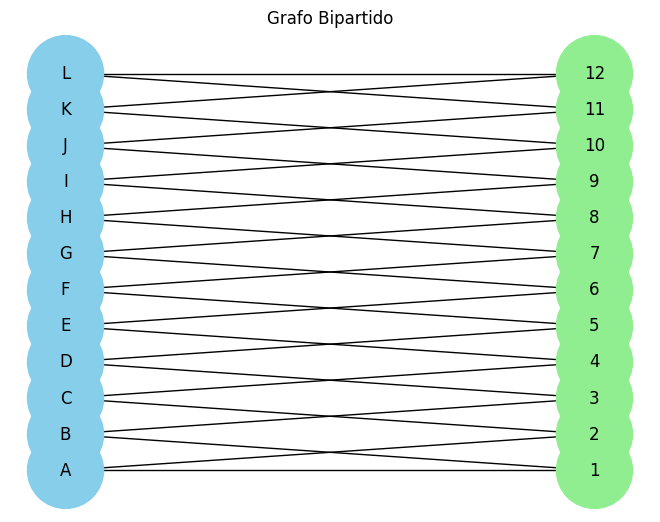

In [ ]:
import time
import tracemalloc
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Função BFS para encontrar um caminho aumentante
def bfs(capacity, flow, source, sink, parent):
    visited = set()
    queue = deque([source])
    visited.add(source)

    while queue:
        u = queue.popleft()

        for v in capacity[u]:
            if v not in visited and capacity[u][v] - flow[u][v] > 0:  # Se há capacidade residual
                parent[v] = u
                if v == sink:
                    return True
                queue.append(v)
                visited.add(v)

    return False

# Algoritmo de Edmonds-Karp para fluxo máximo
def edmonds_karp(capacity, source, sink):
    # Inicializar o fluxo como 0
    flow = defaultdict(lambda: defaultdict(int))
    max_flow = 0
    parent = {}

    while bfs(capacity, flow, source, sink, parent):
        # Encontrar a capacidade residual mínima ao longo do caminho aumentante
        path_flow = float('Inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, capacity[parent[s]][s] - flow[parent[s]][s])
            s = parent[s]

        # Atualizar os fluxos
        v = sink
        while v != source:
            u = parent[v]
            flow[u][v] += path_flow
            flow[v][u] -= path_flow
            v = parent[v]

        # Aumentar o fluxo máximo
        max_flow += path_flow

    return max_flow, flow

# Função para criar o grafo de fluxo bipartido
def create_bipartite_flow_graph():
    global capacity
    U = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
    V = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

    capacity = defaultdict(lambda: defaultdict(int))

    # Conectar os vértices do conjunto U ao source (origem)
    for u in U:
        capacity['source'][u] = 1

    # Conectar os vértices do conjunto V ao sink (destino)
    for v in V:
        capacity[v]['sink'] = 1

    # Conectar os vértices de U a V (grafo bipartido)
    adj = defaultdict(list)
    adj['A'].extend(['1', '2'])
    adj['B'].extend(['1', '3'])
    adj['C'].extend(['2', '4'])
    adj['D'].extend(['3', '5'])
    adj['E'].extend(['4', '6'])
    adj['F'].extend(['5', '7'])
    adj['G'].extend(['6', '8'])
    adj['H'].extend(['7', '9'])
    adj['I'].extend(['8', '10'])
    adj['J'].extend(['9', '11'])
    adj['K'].extend(['10', '12'])
    adj['L'].extend(['11', '12'])

    for u in U:
        for v in adj[u]:
            capacity[u][v] = 1  # Capacidade de 1 entre vértices de U e V

    return capacity, 'source', 'sink', U, V, adj

# Função para medir o desempenho (tempo e memória)
def measure_performance():
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Executar o algoritmo de Edmonds-Karp
    max_flow, flow = edmonds_karp(capacity, source, sink)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Fluxo máximo (emparelhamento perfeito máximo): {max_flow}")
    print("Emparelhamentos:")

    for u in capacity:
        if u in U:  # Apenas os nós do conjunto U
            for v in capacity[u]:
                if flow[u][v] == 1:  # Fluxo de 1 indica emparelhamento
                    print(f"{u} -- {v}")

    print(f"\nTempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Função para exibir o grafo bipartido
def show_bipartite_graph(U, V, adj):
    # Criar o grafo bipartido usando NetworkX
    B = nx.Graph()

    # Adicionar nós de U e V
    B.add_nodes_from(U, bipartite=0)  # Conjunto U no lado esquerdo
    B.add_nodes_from(V, bipartite=1)  # Conjunto V no lado direito

    # Adicionar arestas entre U e V
    for u in U:
        for v in adj[u]:
            B.add_edge(u, v)

    # Definir a posição para exibir os nós do grafo em duas colunas (esquerda e direita)
    pos = {}
    pos.update((node, (0, index)) for index, node in enumerate(U))  # Coloca nós de U à esquerda
    pos.update((node, (1, index)) for index, node in enumerate(V))  # Coloca nós de V à direita

    # Desenhar o grafo
    nx.draw(B, pos, with_labels=True, node_color=["skyblue"] * len(U) + ["lightgreen"] * len(V), node_size=3000, font_size=12)

    # Exibir o gráfico
    plt.title("Grafo Bipartido")
    plt.show()

# Criar o grafo de fluxo bipartido e medir o desempenho
capacity, source, sink, U, V, adj = create_bipartite_flow_graph()
measure_performance()
show_bipartite_graph(U, V, adj)


#<font color=lightgreen>Classe NP

#<font color=lightgreen>Para o Problema do Subconjunto Soma

##Um conjunto com n = 10

In [ ]:
import time
import tracemalloc
from itertools import combinations

# Função para encontrar o subconjunto que soma a S usando força bruta
def subset_sum_brute_force(nums, target):
    n = len(nums)
    # Gerar todos os subconjuntos
    for r in range(n + 1):                                                                   # Geralmente são algoritmos com complexida assintótica O(2^n) também denominados pela literatura de algoritmos força bruta
        for subset in combinations(nums, r):
            if sum(subset) == target:                                                        # Porém usando programação dinâmica temos uma melhora para a complexidade podendo atingir O (n X S)
                return subset  # Retorna o primeiro subconjunto encontrado
    return None  # Se nenhum subconjunto é encontrado

# Função para medir o desempenho (tempo e memória)
def measure_performance(nums, target):
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Encontrar o subconjunto
    subset = subset_sum_brute_force(nums, target)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Conjunto: {nums}")
    print(f"Subconjunto que soma {target}: {subset if subset else 'Nenhum'}")
    print(f"Valor de S: {target}")
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Definir o conjunto e o valor de S
nums = [3, 34, 4, 12, 5, 2, 7, 8, 1, 11]  # Exemplo de 10 elementos
S = 9  # Valor alvo

# Medir o desempenho
measure_performance(nums, S)


Conjunto: [3, 34, 4, 12, 5, 2, 7, 8, 1, 11]
Subconjunto que soma 9: (4, 5)
Valor de S: 9
Tempo de execução: 0.000152 segundos
Memória utilizada: 632 bytes


##Um conjunto com n = 30

In [ ]:
import time
import tracemalloc
from itertools import combinations

# Função para encontrar o subconjunto que soma a S usando força bruta
def subset_sum_brute_force(nums, target):
    n = len(nums)
    # Gerar todos os subconjuntos
    for r in range(n + 1):
        for subset in combinations(nums, r):
            if sum(subset) == target:
                return subset  # Retorna o primeiro subconjunto encontrado
    return None  # Se nenhum subconjunto é encontrado

# Função para medir o desempenho (tempo e memória)
def measure_performance(nums, target):
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Encontrar o subconjunto
    subset = subset_sum_brute_force(nums, target)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Conjunto: {nums}")
    print(f"Subconjunto que soma {target}: {subset if subset else 'Nenhum'}")
    print(f"Valor de S: {target}")
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Definir o conjunto e o valor de S
nums = [i for i in range(1, 31)]  # Conjunto de 30 elementos: {1, 2, ..., 30}
S = 100  # Valor alvo

# Medir o desempenho
measure_performance(nums, S)


Conjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Subconjunto que soma 100: (13, 28, 29, 30)
Valor de S: 100
Tempo de execução: 0.024346 segundos
Memória utilizada: 2509 bytes


##Neste algoritmo é solicitado ao usuário a quantidade de n elemntos a serem colocados no conjunto e o valor álvo S obtido com a soma dos elementos do subconjunto

##Com n = 100 elementos

In [ ]:
import time
import tracemalloc
from itertools import combinations

# Função para encontrar o subconjunto que soma a S usando força bruta
def subset_sum_brute_force(nums, target):
    n = len(nums)
    # Gerar todos os subconjuntos
    for r in range(n + 1):
        for subset in combinations(nums, r):
            if sum(subset) == target:
                return subset  # Retorna o primeiro subconjunto encontrado
    return None  # Se nenhum subconjunto é encontrado

# Função para medir o desempenho (tempo e memória)
def measure_performance(nums, target):
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Encontrar o subconjunto
    subset = subset_sum_brute_force(nums, target)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Conjunto: {nums}")
    print(f"Subconjunto que soma {target}: {subset if subset else 'Nenhum'}")
    print(f"Valor de S: {target}")
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Solicitar ao usuário os valores de n e S
n = int(input("Digite o valor de n (número de elementos no conjunto): "))
S = int(input("Digite o valor de S (soma alvo): "))

# Gerar o conjunto de 1 a n
nums = [i for i in range(1, n + 1)]

# Medir o desempenho
measure_performance(nums, S)


Digite o valor de n (número de elementos no conjunto): 100
Digite o valor de S (soma alvo): 172
Conjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Subconjunto que soma 172: (72, 100)
Valor de S: 172
Tempo de execução: 0.004498 segundos
Memória utilizada: 1472 bytes


#<font color=lightgreen>Programação Dinâmica:

* A função subset_sum_dynamic usa uma tabela para armazenar se uma soma específica pode ser obtida com um subconjunto dos primeiros i elementos.

* Complexidade: A complexidade do algoritmo é O(n X S), tornando-o viável para valores maiores de n e S em comparação ao algoritmo de força bruta.
Entrada do Usuário: Permite ao usuário digitar os valores de n e S.

##Com n = 1000 elementos

In [ ]:
import time
import tracemalloc

# Função para encontrar se existe um subconjunto que soma a S usando programação dinâmica
def subset_sum_dynamic(nums, target):
    n = len(nums)
    # Criar uma tabela para armazenar resultados de subproblemas
    dp = [[False] * (target + 1) for _ in range(n + 1)]

    # A soma 0 pode ser obtida com um subconjunto vazio
    for i in range(n + 1):
        dp[i][0] = True

    # Preencher a tabela dp
    for i in range(1, n + 1):                                               # Porém usando programação dinâmica temos uma melhora para a complexidade podendo atingir O (n X S)
        for j in range(1, target + 1):
            if nums[i - 1] <= j:
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - nums[i - 1]]
            else:
                dp[i][j] = dp[i - 1][j]

    return dp[n][target]  # Retorna True se a soma for possível

# Função para medir o desempenho (tempo e memória)
def measure_performance(nums, target):
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Encontrar se existe um subconjunto
    exists = subset_sum_dynamic(nums, target)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Conjunto: {nums}")
    print(f"Subconjunto que soma {target}: {'Sim' if exists else 'Não'}")
    print(f"Valor de S: {target}")
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Solicitar ao usuário os valores de n e S
n = int(input("Digite o valor de n (número de elementos no conjunto): "))
S = int(input("Digite o valor de S (soma alvo): "))

# Gerar o conjunto de 1 a n
nums = [i for i in range(1, n + 1)]

# Medir o desempenho
measure_performance(nums, S)


Digite o valor de n (número de elementos no conjunto): 1000
Digite o valor de S (soma alvo): 794
Conjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 

#<font color=lightgreen>Para n e S Muito Grande Com o Uso de Heurística

Ordenação: Os números são ordenados em ordem decrescente para que o algoritmo guloso comece a adicionar os maiores valores primeiro.

Heurística: A função subset_sum_heuristic tenta construir um subconjunto cuja soma se

#<font color=lightgreen>Heurística

* Função subset_sum_with_min_elements: Essa função procura todos os subconjuntos que têm pelo menos um número mínimo de elementos e que somam exatamente S.

* Combinations: Usamos a função combinations da biblioteca itertools para gerar subconjuntos de tamanhos variados, começando pelo mínimo especificado.

##Neste algoritmo usando Heuristica, é solicitado ao usuário o número n de elementos do conjunto, o número álvo S e o número de elementos do subconjunto que somados vão dar o elemento S ou o valor próximo deste elemento. Foi implementado também uma limitação para o valor de n sendo o limite de 1.000.000 (um milhão de elementos para o conjunto).

##Com n = 1000 elementos

In [ ]:
import random
import time
import tracemalloc

# Função heurística para encontrar subconjunto que soma S com elementos únicos
def heuristic_subset_sum_unique(nums, target, min_elements):
    # Usar um conjunto para garantir elementos únicos
    unique_nums = list(set(nums))
    # Ordenar os números em ordem decrescente
    sorted_nums = sorted(unique_nums, reverse=True)
    subset = []
    current_sum = 0

    for num in sorted_nums:
        if current_sum + num <= target:
            subset.append(num)
            current_sum += num
            if len(subset) >= min_elements and current_sum == target:
                return subset  # Retorna o subconjunto se a soma alvo é alcançada

    return None  # Se nenhum subconjunto é encontrado

# Função para medir o desempenho (tempo e memória)
def measure_performance(nums, target, min_elements):
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Encontrar o subconjunto
    subset = heuristic_subset_sum_unique(nums, target, min_elements)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Conjunto: {nums[:10]}... (total {len(nums)})")  # Exibe apenas os primeiros 10 elementos
    print(f"Subconjunto que soma {target} com pelo menos {min_elements} elementos: {subset if subset else 'Nenhum'}")
    print(f"Valor de S: {target}")
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Solicitar ao usuário os valores de n, S e o número mínimo de elementos
n = int(input("Digite o valor de n (número de elementos no conjunto, máximo 1.000.000): "))
S = int(input("Digite o valor de S (soma alvo): "))
min_elements = int(input("Digite o número mínimo de elementos no subconjunto: "))

# Verifica se n é maior que 1.000.000
if n > 1_000_000:
    print("O valor de n não pode ser maior que 1.000.000. Usando 1.000.000 como limite.")
    n = 1_000_000

# Gerar um conjunto de n números aleatórios entre 1 e 100
if n <= 100:
    nums = random.sample(range(1, 101), n)  # Garante elementos únicos
else:
    nums = random.choices(range(1, 101), k=n)  # Permite repetição

# Medir o desempenho
measure_performance(nums, S, min_elements)


Digite o valor de n (número de elementos no conjunto, máximo 1.000.000): 1000
Digite o valor de S (soma alvo): 759
Digite o número mínimo de elementos no subconjunto: 7
Conjunto: [48, 44, 83, 46, 27, 20, 81, 41, 71, 64]... (total 1000)
Subconjunto que soma 759 com pelo menos 7 elementos: [100, 99, 98, 97, 96, 95, 94, 80]
Valor de S: 759
Tempo de execução: 0.000109 segundos
Memória utilizada: 10976 bytes


##Neste caso como são muitos os elementos para n, o algoritmo retornou que não encontrou valor exato mas pode ser melhorado em trabalhos futuros para que retorne usando heurística resultados aproximados.

##Para n = 1.000.000 de elementos

In [ ]:
import random
import time
import tracemalloc

# Função heurística para encontrar subconjunto que soma S com elementos únicos
def heuristic_subset_sum_unique(nums, target, min_elements):
    # Usar um conjunto para garantir elementos únicos
    unique_nums = list(set(nums))
    # Ordenar os números em ordem decrescente
    sorted_nums = sorted(unique_nums, reverse=True)
    subset = []
    current_sum = 0

    for num in sorted_nums:
        if current_sum + num <= target:
            subset.append(num)
            current_sum += num
            if len(subset) >= min_elements and current_sum == target:
                return subset  # Retorna o subconjunto se a soma alvo é alcançada

    return None  # Se nenhum subconjunto é encontrado

# Função para medir o desempenho (tempo e memória)
def measure_performance(nums, target, min_elements):
    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    # Encontrar o subconjunto
    subset = heuristic_subset_sum_unique(nums, target, min_elements)

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Conjunto: {nums[:10]}... (total {len(nums)})")  # Exibe apenas os primeiros 10 elementos
    print(f"Subconjunto que soma {target} com pelo menos {min_elements} elementos: {subset if subset else 'Nenhum'}")
    print(f"Valor de S: {target}")
    print(f"Tempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória utilizada: {peak} bytes")

# Solicitar ao usuário os valores de n, S e o número mínimo de elementos
n = int(input("Digite o valor de n (número de elementos no conjunto, máximo 1.000.000): "))
S = int(input("Digite o valor de S (soma alvo): "))
min_elements = int(input("Digite o número mínimo de elementos no subconjunto: "))

# Verifica se n é maior que 1.000.000
if n > 1_000_000:
    print("O valor de n não pode ser maior que 1.000.000. Usando 1.000.000 como limite.")
    n = 1_000_000

# Gerar um conjunto de n números aleatórios entre 1 e 100
if n <= 100:
    nums = random.sample(range(1, 101), n)  # Garante elementos únicos
else:
    nums = random.choices(range(1, 101), k=n)  # Permite repetição

# Medir o desempenho
measure_performance(nums, S, min_elements)

Digite o valor de n (número de elementos no conjunto, máximo 1.000.000): 1000000
Digite o valor de S (soma alvo): 74193
Digite o número mínimo de elementos no subconjunto: 8
Conjunto: [23, 68, 83, 82, 82, 95, 66, 11, 30, 76]... (total 1000000)
Subconjunto que soma 74193 com pelo menos 8 elementos: Nenhum
Valor de S: 74193
Tempo de execução: 0.008292 segundos
Memória utilizada: 10976 bytes


#<font color=lightgreen>Anexo (Outro Exemplo Para Classe P)

#<font color=lightgreen>Torre de Hanoi

##O problema envolve mover discos de diferentes tamanhos entre três hastes, obedecendo a certas regras (um disco maior nunca pode ser colocado sobre um menor, e apenas um disco pode ser movido por vez). A solução mais conhecida para esse problema é um algoritmo recursivo que resolve o problema em tempo exponencial, com uma complexidade de O (2^n ), onde n é o número de discos.

##**OBS:** Porém neste algoritmo é solicitado ao usuário a quantidade de discos e é exibido na tela o número de discos, o total de movimentos, a listagem dos movimentos, o tempo gasto de processamento e memória utilizada.



In [ ]:
import time
import tracemalloc

def hanoi(n, origem, destino, auxiliar, movimentos):
    if n == 1:
        movimentos.append((origem, destino))  # Registrar movimento
        return
    hanoi(n - 1, origem, auxiliar, destino, movimentos)  # Mover n-1 discos para a torre auxiliar
    movimentos.append((origem, destino))  # Mover o disco restante para a torre de destino
    hanoi(n - 1, auxiliar, destino, origem, movimentos)  # Mover os n-1 discos da torre auxiliar para a torre de destino

# Função principal para executar o algoritmo e exibir os resultados
def solve_hanoi(n):
    movimentos = []

    # Iniciar a medição de tempo e memória
    tracemalloc.start()
    start_time = time.time()

    hanoi(n, 'A', 'C', 'B', movimentos)  # A: origem, C: destino, B: auxiliar

    # Calcular o tempo e a memória usados
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Exibir os resultados
    print(f"Número de discos: {n}")
    print(f"Total de movimentos: {len(movimentos)}")
    print("Movimentos:")
    for origem, destino in movimentos:
        print(f"Move disco de {origem} para {destino}")

    # Exibir tempo de execução e memória utilizada
    print(f"\nTempo de execução: {end_time - start_time:.6f} segundos")
    print(f"Memória máxima utilizada: {peak} bytes")

# Solicitar ao usuário o número de discos
n = int(input("Digite o número de discos (n): "))

# Executar a solução e mostrar os resultados
solve_hanoi(n)


Digite o número de discos (n): 10
Número de discos: 10
Total de movimentos: 1023
Movimentos:
Move disco de A para B
Move disco de A para C
Move disco de B para C
Move disco de A para B
Move disco de C para A
Move disco de C para B
Move disco de A para B
Move disco de A para C
Move disco de B para C
Move disco de B para A
Move disco de C para A
Move disco de B para C
Move disco de A para B
Move disco de A para C
Move disco de B para C
Move disco de A para B
Move disco de C para A
Move disco de C para B
Move disco de A para B
Move disco de C para A
Move disco de B para C
Move disco de B para A
Move disco de C para A
Move disco de C para B
Move disco de A para B
Move disco de A para C
Move disco de B para C
Move disco de A para B
Move disco de C para A
Move disco de C para B
Move disco de A para B
Move disco de A para C
Move disco de B para C
Move disco de B para A
Move disco de C para A
Move disco de B para C
Move disco de A para B
Move disco de A para C
Move disco de B para C
Move disco

#<font color=lightgreen>Recursos Computacionais

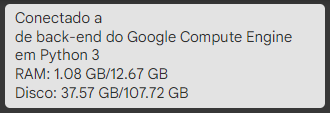

#<font color=lightgreen>Referência Bibliográfica

* CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: ‎ 978-8535236996

* KLEINBERG, J., TARDOS E., Algorithm Design, 1st ed., Cornell University, Pearson Education, Inc., 2006, ISBN 0-321-29535-8

* PAPADIMITRIOU, C. M., Computational Complexity, University of California- San Diego, Addison-Wesley Publishing Company, Inc., 1995, ISBN 0-201-53082-1

* ERICKSON J., Algorithms, 1st edition, University of Illinois,  Independently published (June 13, 2019), ISBN: 978-1-792-64483-2

* GAREY M. R., JOHNSON D. S., Computers end Intractability (A Guide to the Theory of NP-Completeness), Bell Telephone Laboratories. Incorporated, 1979, ISBN: 0-7167-1045-5

* SAIP H. A. B., Algoritmos para Emparelhamentos em Grafos Bipartidos, Departamento de Ciência da Computação IMECC – UNICAMP, 1993

* CARVALHO M. H., CERIOLI M. R., DAHAB R. et al., Uma Introdução Sucinta a Algoritmos de Aproximação, Universidade Federal do Mato Grosso do Sul, do Rio de Janeiro e Universidade Estadual de Campinas, Literatura redigida como parte do Projeto ProNEx Complexidade de Estruturas Discretas, 2001

* MARIANO D., Networkx Analisando grafos com Python e a biblioteca Networkx, 2020, https://diegomariano.com/networkx/

* Documentação NetWorkX, https://networkx.org/documentation/stable/tutorial.html

* Wikipedia, Algoritmo de Hopcroft-Karp, https://pt.wikipedia.org/wiki/Algoritmo_de_Hopcroft%E2%80%93Karp

* Wikipedia, Algoritmo de Edmonds-Karp, https://pt.wikipedia.org/wiki/Algoritmo_de_Edmonds-Karp

* BERNARDI A. D., Fluxo Máximo (Notas de Aula), Brazilian ICPC Summer School, https://maratona.ic.unicamp.br/MaratonaVerao2022/slides/fluxo_maximo.pdf

* Wikipedia, Problema da soma dos subconjuntos, https://pt.wikipedia.org/wiki/Problema_da_soma_dos_subconjuntos

* Wikipedia, NP-Completo, https://pt.wikipedia.org/wiki/NP-completo

* Wikipedia, Torre de Hanoi, https://pt.wikipedia.org/wiki/Torre_de_Han%C3%B3i

* FEOFILOF P., Complexidade e problemas NP-completos, Departamento de Ciência da Computação, Instituto de Matemática e Estatística USP, 2021, Feofiloffhttps://www.ime.usp.br/~pf/analise_de_algoritmos/aulas/NPcompleto.html